In [1]:
# This program predicts stock prices by using machine learning models
#Installing dependencies 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Getting the stock quote

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-01')

#show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643502
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783868
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917508
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897017
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994522
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679642
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077


In [5]:
#getting the number of rows and columns in data set
df.shape

(2265, 6)

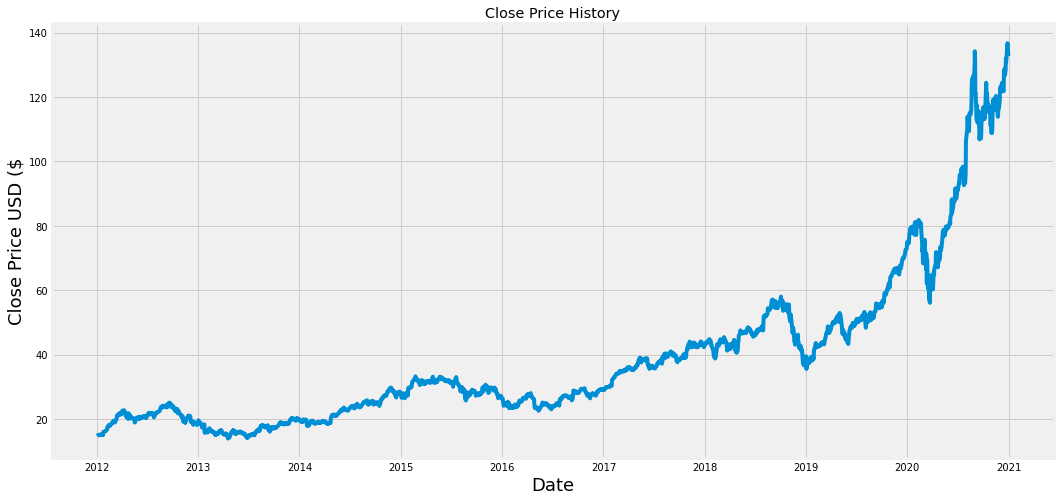

In [6]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($', fontsize=18)
plt.show()

In [7]:
#creating a new df with only the 'Close' column
data = df.filter(['Close'])

#converting  the df to a numpy array
dataset = data.values

#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1812

In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [10]:
# Create the training dataset
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#splitting the data into train and test
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(X_train)
    print(y_train)
    print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]



In [11]:
#Convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
#reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1752, 60, 1)

In [15]:
#Build the ML model (LSTM)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

1752/1752 [==============================] - 56s 29ms/step - loss: 1.9273e-04


In [18]:
#Creating the testing dataset
test_data = scaled_data[training_data_len - 60: , :]
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])
  

In [19]:
#convert the data into numpy array
X_test = np.array(X_test)

In [20]:
#Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
# Get the model's predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
#Getting the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.0808401532582095

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

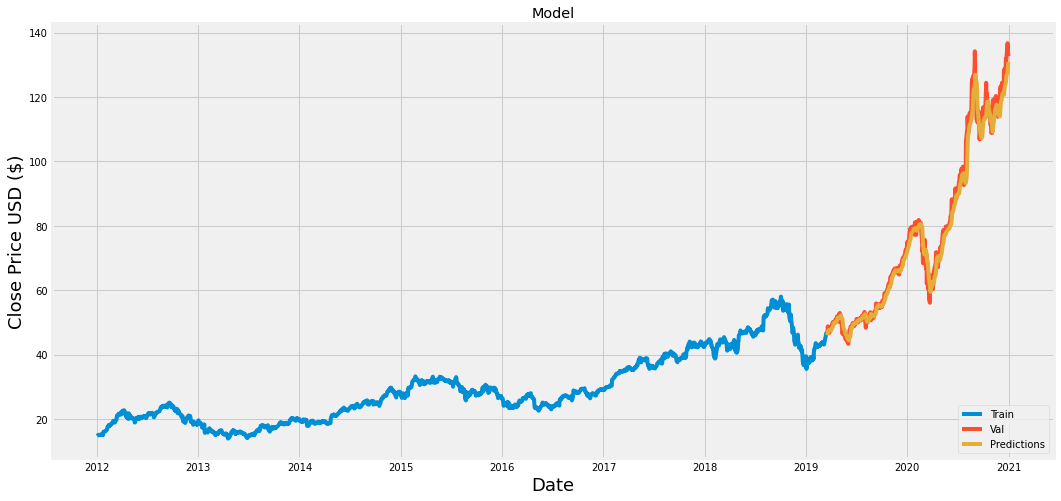

In [23]:
#Plotting the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [24]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2019-03-19,46.632500,45.987858
2019-03-20,47.040001,46.370892
2019-03-21,48.772499,46.697163
2019-03-22,47.762501,47.214317
2019-03-25,47.185001,47.579845
...,...,...
2020-12-24,131.970001,126.633736
2020-12-28,136.690002,127.510826
2020-12-29,134.869995,129.024063


In [26]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-01')

#creating new df
df_new = apple_quote.filter(['Close'])

#getting the last 60 day closing price values and convert the df to an array
last_60_days = df_new[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Getting the predicted scaled price
pred_price = model.predict(X_test)

#reverse scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[130.94627]]


In [29]:
apple_quote1 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-31', end='2021-01-01')
print(apple_quote1['Close'])

Date
2020-12-31    132.690002
Name: Close, dtype: float64
